In [139]:
def VES1dmodYunus(r,t,X): # Yunus Levent Ekinci and Alper Demicri 2008
    roa=np.zeros(len(X))
#     for i in range(len(x)):
#     #     s = x(i5);
#         g = VES1dmod (r,t,x[i]);
#         roa[i] = g;
    q = 13;
    f = 10;
    m = 4.438;
    x = 0;
    e = np.exp(0.5*np.log(10)/m);
    h = 2*q-2;

    l = len(r)-1;
    n = 1;    
#     ares=[]
    for si in range(len(X)):
        a=np.zeros(n+h)
        u = X[si]*np.exp(-f*np.log(10)/m-x);
    #     print(n+h+1)
        for i in range(0,n+h):
            w = l;
            v = r[l];
            while w>0:
                w = w-1;
                aa = np.tanh(t[w]/u);fp
                v = (v+r[w]*aa)/(1+v*aa/r[w]);

            a[i]=v;
            u = u*e;

        i = 0;
        g = 105*a[i]-262*a[i+2]+416*a[i+4]-746*a[i+6]+1605*a[i+8];
        g = g-4390*a[i+10]+13396*a[i+12]-27841*a[i+14];
        g = g+16448*a[i+16]+8183*a[i+18]+2525*a[i+20];
        g = (g+336*a[i+22]+225*a[i+24])/10000;
        roa[si]=g
    return roa

In [140]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [141]:

# y=np.diff(np.log(OA)) # in ghosh transform y is log(u) and u is exp(y). Y is spacing of log distances
# # y is close to 0.38 for the OA given in this example
# u=np.exp(y) # u = 1.468 given y=0.38
# # Number of layers (basement include):
# nLayers = len(resistivities)

# # ab2=pd.read_csv('ab2.dat',sep='\t', header=None)
# ab2=pd.read_csv('mahoba.dat',sep='\t', header=None)
# # np.subtract.outer(allsamp, x)


In [143]:
# Computation of resistivity transform adapted from Koefoed (1970) by Ghosh (1971)
def resistivityTransform(resistivities, thicknesses, OA) :
    y=np.diff(np.log(OA))[0] # in ghosh transform y is log(u) and u is exp(y). Y is spacing of log distances
    # y is close to 0.38 for the OA given in this example
    u=np.exp(y) # u = 1.468 given y=0.38
    # Number of layers (basement include):
    nLayers = len(resistivities)
    nSamples= len(OA)
    # Resistivity transforms:
    RT = []
#     RT.length = nSamples;
    
#     T = []
#     T.length = nSamples - 1;
#     var index;
    
    for i in range(nSamples):
        T=[]
        index = 0;
        K = (resistivities[nLayers-1] - resistivities[nLayers -2])/(resistivities[nLayers-1] + resistivities[nLayers-2])
#         print(K)
        T.append( resistivities[nLayers-2] * (1 + K * np.exp(-2*thicknesses[nLayers-2]/OA[i]))/(1 - K * np.exp(-2*thicknesses[nLayers-2]/OA[i])))
        
        for j in range(nLayers-3,-1,-1):
            Tab = resistivities[j]*(1-np.exp(-2*thicknesses[j]/OA[i]))/(1+np.exp(-2*thicknesses[j]/OA[i]));
#             index += 1;
            T.append((Tab+T[-1])/(1+Tab*T[-1]/(resistivities[j]*resistivities[j])));
        RT.append(T[-1]);
    
    return RT;


# // Compute apparent resistivity curve using Ghosh's linear filter.
# // Ghosh, D.P., 1971, Inverse filter coefficients for the computation of apparent resistivity, Geophysical Prospecting 19, 769-775
def ghoshFilter(resistivities, thicknesses, OA):
#     // Filter coefficients
    b = [0.0225,-0.0499,0.1064,0.1854,1.9720,-1.5716,0.4018,-0.0814,0.0148]
    
#     // Compute resistivity transform
    RT = resistivityTransform(resistivities, thicknesses, OA);
    nSamples=len(OA)
    print('RT Length= ',len(RT))
#     // Compute apparent resistivities
    apparentResisitivies = [];
    apparentResisitivies = np.zeros(nSamples);
    for i in range( 10,len(OA)-6):
        apparentResisitivies[i] = 0;
        for j in range(-3,6):
            apparentResisitivies[i] += b[j+3]*RT[i-j*2]
    return apparentResisitivies,RT


def get_ghosh_ares(resistivities, thicknesses, OA):
    
    appRes,RT = ghoshFilter(resistivities, thicknesses, OA);
    
    apparentResistivities = [];
    halfSpacing = [];
    rt=[]
    
    for i in range(13,len(OA)):
        apparentResistivities.append(appRes[i]);
        halfSpacing.append(OA[i]);
        rt.append(RT[i])
    
    
    return np.array(halfSpacing), np.array(apparentResistivities),rt
def find_nearest_indices(array, values):
    indices = np.abs(np.subtract.outer(array, values)).argmin(0)
    return indices

def VES1dmodGhosh(resistivities, thicknesses,x):
    allsamp=np.logspace(-0.5, 4.0, num=134)

    dist1,ares1,rt=get_ghosh_ares(resistivities, thicknesses,allsamp)
    indxs=find_nearest_indices(dist1, x)   
#     dist=dist1[indxs]
    ares=ares1[indxs]
    return ares

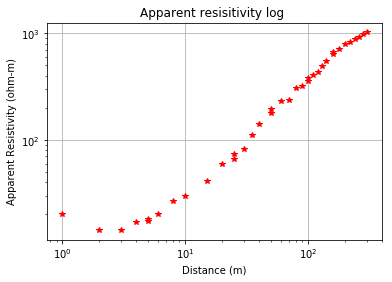

In [144]:
def plot_ares(ab2):
    plt.loglog(ab2[0],ab2[1],'*r', basex=10)
    plt.grid(True)
    plt.title('Apparent resisitivity log ')
    plt.xlabel('Distance (m)')
    plt.ylabel('Apparent Resistivity (ohm-m)')
ab2=pd.read_csv('mahoba.dat',sep='\t', header=None)
ab2
plot_ares(ab2)

In [148]:
# x-dist1[indxs]

# vals=[]
# for num in range(60,200,1):
#     allsamp=np.logspace(-0.5, 4.0, num=num)
#     indxs=find_nearest_indices(allsamp, x)
#     vals.append(np.sum(np.abs(allsamp[indxs]-x)))
# print(np.array(vals))
# x,dist1

RT Length=  134


(1, 10000)

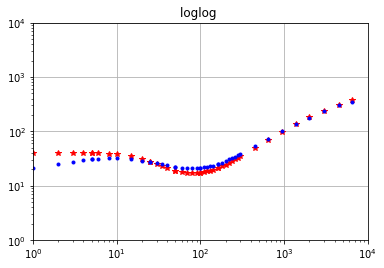

In [146]:
resistivities=[20,40,15,620]
thicknesses=[1.2,12,120]

np.set_printoptions(precision=2,suppress=True)



x = ab2[0].values;
x=np.append(x,[450, 650, 950, 1400, 2000, 3000, 4500, 6500])


# for num in range(60,200,2):
#     allsamp=np.logspace(-0.5, 3.0, num=num)
#     indxs=find_nearest_indices(allsamp, x)
#     print('{}: {}'.format(num,np.sum(np.abs(allsamp[indxs]-x))))
aresG=VES1dmodGhosh(resistivities, thicknesses,x)
aresY=VES1dmodYunus(resistivities, thicknesses,x)
# plt.plot(dist,ares)
plt.subplots_adjust(hspace=0.4)

# log x and y axis
plt.subplot(111)
plt.loglog(x,aresY,'*r', basex=10)
# plt.loglog(dist,rt,'*g', basex=10)
plt.loglog(x,aresG,'.b', basex=10)
plt.grid(True)
plt.title('loglog ')
plt.xlim(1,10000)
plt.ylim(1,10000)
# print(np.abs(allsamp[indxs]-x))
# # allsamp[indxs],x,len(allsamp[allsamp<=310]),allsamp
# len(allsamp[allsamp<=310])+6,find_nearest_indices(allsamp, x[:1])


RT Length=  44
31


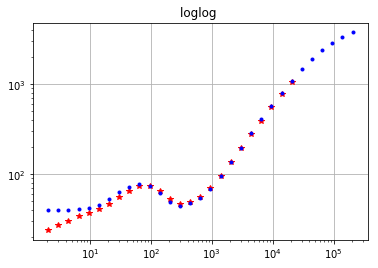

In [92]:
resistivities=[20,40,130,15,620,30,4500]
thicknesses=[1.2,12,40,60,15,300]
# AB/2 spacing:
OA =     [0.0139790406440197, 0.0205184256193513, 0.0301169300968417, 0.0442056079391693, 0.0648849589579011, 0.0952380952380952, 0.139790406440197, 0.205184256193513, 0.301169300968417, 0.442056079391693, 0.648849589579011, 0.952380952380952, 1.39790406440197, 2.05184256193513, 3.01169300968417, 4.42056079391693, 6.48849589579011, 9.52380952380952, 13.9790406440197, 20.5184256193513, 30.1169300968417, 44.2056079391693, 64.8849589579011, 95.2380952380952, 139.790406440197, 205.184256193513, 301.169300968417, 442.056079391693, 648.849589579011, 952.380952380952, 1397.90406440197, 2051.84256193513, 3011.69300968417, 4420.56079391693, 6488.49589579011, 9523.80952380952, 13979.0406440197, 20518.4256193513, 30116.9300968417, 44205.6079391693, 64884.9589579011, 95238.0952380952, 139790.406440197, 205184.256193513];

dist,ares,rt=get_ghosh_ares(resistivities, thicknesses,OA)

ares2=VES1dmod(resistivities, thicknesses,OA)
# plt.plot(dist,ares)
plt.subplots_adjust(hspace=0.4)

# log x and y axis
plt.subplot(111)
plt.loglog(dist,ares,'*r', basex=10)
# plt.loglog(dist,rt,'*g', basex=10)
plt.loglog(OA[13:],ares2[13:],'.b', basex=10)
plt.grid(True)
plt.title('loglog ')
print(len(dist))

In [35]:
# What is y and u in resistivity transform
y=np.diff(np.log(OA))[0] # in ghosh transform y is log(u) and u is exp(y). Y is spacing of log distances
y
u=np.exp(y)
y,u,np.log(u),(1/6)*np.log(10)

(0.38376418216567654,
 1.4677992676220728,
 0.38376418216567648,
 0.38376418216567432)

In [95]:
[[r, a] for r,a in zip(rt ,ares)]

[[24.617457751611447, 23.804602630868487],
 [27.076305366690352, 26.891640144230621],
 [29.682162562234371, 30.424990153730324],
 [32.512919263769533, 33.832944011342661],
 [36.187013359187389, 37.128403287454638],
 [41.493110062370661, 41.087791829279794],
 [48.632631666278591, 46.98684147499462],
 [56.358539584549042, 55.548692812194396],
 [61.764577501862995, 65.623175407011686],
 [62.510671367038789, 73.441101518371624],
 [59.568071687408668, 73.561129850704901],
 [55.766116551953687, 64.197049982597662],
 [52.813968585750388, 52.301240931157615],
 [51.53311688713805, 46.934671400764437],
 [53.449364859398983, 49.273461313433423],
 [60.78925199106542, 56.30669325937383],
 [75.914275199540526, 69.694664519156674],
 [101.51998099058636, 94.674480684697244],
 [141.21551907291374, 135.12454845372952],
 [200.0345865936367, 194.29290604320309],
 [284.77694140046287, 277.81841178342097],
 [404.07944193118124, 394.41488939906537],
 [567.95129005810611, 555.12175180878137]]